В этом задании вы сможете немного расслабиться после реализации случайного леса и градиентного бустинга по мотивам материалов прошлой недели. Все, что нужно будет делать — запускать методы из sklearn. Вам предлагается выяснить, какое распределение лучше использовать в наивном байесовском классификаторе в зависимости от вида признаков.

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки. С помощью sklearn.cross_validation.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько полученные результаты согласуются с рекомендациями из лекций?

Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы можете продолжить исследование на других выборках (например, из UCI репозитория). 

Для сдачи задания, ответьте на приведенные ниже вопросы.

In [3]:
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import numpy as np

In [11]:
digits = load_digits()
cancer = load_breast_cancer()

In [12]:
X_d = digits.data
y_d = digits.target

X_c = cancer.data
y_c = cancer.target

## Бернулли:

In [19]:
digits_res = []
cancer_res = []
def append_to_res(digits_mean, cancer_mean):
    digits_res.append(digits_mean)
    cancer_res.append(cancer_mean)

In [13]:
bernoulli_d = cross_val_score(BernoulliNB(), X_d, y_d)
bernoulli_c = cross_val_score(BernoulliNB(), X_c, y_c)

In [14]:
print(f'Bernoulli NB digits: {bernoulli_d.mean()}')
print(f'Bernoulli NB cancer: {bernoulli_c.mean()}')

Bernoulli NB digits: 0.8241736304549674
Bernoulli NB cancer: 0.6274181027790716


In [20]:
append_to_res(bernoulli_d.mean(), bernoulli_c.mean())

## Мультиномиальное распределение

In [15]:
multinomial_d = cross_val_score(MultinomialNB(), X_d, y_d)
multinomial_c = cross_val_score(MultinomialNB(), X_c, y_c)

In [16]:
print(f'Multinomial NB digits: {multinomial_d.mean()}')
print(f'Multinomial NB cancer: {multinomial_c.mean()}')

Multinomial NB digits: 0.8703497369235531
Multinomial NB cancer: 0.8963204471355379


In [21]:
append_to_res(multinomial_d.mean(), multinomial_c.mean())

## Гауссовский НБ

In [23]:
def get_results(estimator, name):
    estimator_d = cross_val_score(estimator, X_d, y_d)
    estimator_c = cross_val_score(estimator, X_c, y_c)
    
    print(f'{name} NB digits: {estimator_d.mean()}')
    print(f'{name} NB cancer: {estimator_c.mean()}')
    
    append_to_res(estimator_d.mean(), estimator_c.mean())

In [24]:
get_results(GaussianNB(), 'Gaussian')

Gaussian NB digits: 0.8069281956050759
Gaussian NB cancer: 0.9385188635305075


In [25]:
digits_res

[0.8241736304549674, 0.8703497369235531, 0.8069281956050759]

In [26]:
classifiers = ['BernoulliNB', 'MultinomialNB', 'GaussianNB']

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
def plot_results(digits_res, cancer_res):
    xs = [1,2,3]
    plt.plot(xs, digits_res, color='b', marker='o')
    plt.plot(xs, cancer_res, color='r', marker='o')
    plt.grid()
    plt.legend('DC')
    plt.ylabel('Score')
    plt.show()

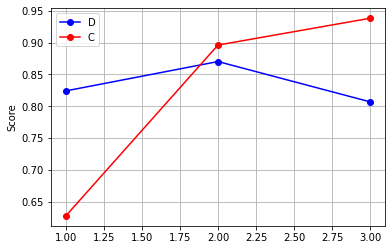

In [41]:
plot_results(digits_res, cancer_res)

Отсюда видим, что Бернулли был хорош только на digits и очень плох на cancer. Посмотрим, почему это могло быть так.

In [43]:
print(X_d.shape)
print(X_c.shape)

(1797, 64)
(569, 30)


In [44]:
X_d

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [45]:
X_c

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Читаем в документации: Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

Так и выходит: Digits имеет дискретные значения признаков в отличии от breast_cancer и поэтому даёт плохие результаты

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

То есть мультиномиальный уже может работать не с дискретными значениями.

Вопрос 1

Каким получилось максимальное качество классификации на датасете breast_cancer?

In [47]:
def write_ans_1(ans):
    with open('ans1.txt', 'w') as ans1:
        ans1.write(str(ans))

In [48]:
write_ans_1(max(cancer_res))

Вопрос 2

Каким получилось максимальное качество классификации на датасете digits?

In [49]:
def write_ans_2(ans):
    with open('ans2.txt', 'w') as ans2:
        ans2.write(str(ans))

In [50]:
write_ans_2(max(digits_res))

Вопрос 3

Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

1) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

2) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

3) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

4) На вещественных признаках лучше всего сработало нормальное распределение

In [51]:
true_nums = [3, 4]

In [57]:
def write_ans_3(ans):
    with open('ans3.txt', 'w') as ans3:
        ans3.write(" ".join(map(str, ans)))

In [58]:
write_ans_3(true_nums)